In [116]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.ticker import FuncFormatter

plt.rc("axes", titlesize="medium")
plt.rc("axes", titlelocation="left")
plt.rc("axes.spines", right=False)
plt.rc("axes.spines", top=False)
# sizets = (8, 4.5)
# plt.rc("figure", figsize=sizets)

legend_right = dict(loc="center left", bbox_to_anchor=[1, 0.5])

np.set_printoptions(precision=3)

# for colour palette
colours = ["#333446", "#7F8CAA", "#B8CFCE", "#EAEFEF"]
pallete = plt.cm.colors.ListedColormap(colours)

regression_c = ["#3D74B6", "#DC3C22", "#EAC8A6"]
regression_pallete = plt.cm.colors.ListedColormap(regression_c)

# --- image main
save_dir = "../portfolio/themes/blog/static/images"
file_name = "2025-07-17-nc-ns-clr"

# we will also set the random seed to 1
seed = 1
np.random.seed(seed)

In [117]:
m = 25
n = 1

ai = np.random.normal(size=(m, n))
bi = ai * 3.0 + 10 + np.random.normal(scale=1.0, size=(m, 1))

A = np.column_stack([ai, bi])

print(A[:5, :])

[[ 1.624 14.189]
 [-0.612  8.042]
 [-0.528  7.48 ]
 [-1.073  6.513]
 [ 0.865 13.127]]


In [118]:
a1 = np.random.uniform(0.6, 1.0, m)
b1 = 3 * a1 + 2 + np.random.normal(0, 0.1, m)

a2 = np.random.uniform(0.4, 0.8, m)
b2 = 3 * a2 + 5 + np.random.normal(0, 0.1, m)

a3 = np.random.uniform(0.2, 0.6, m)
b3 = 3 * a3 + 7 + np.random.normal(0, 0.1, m)

a4 = np.random.uniform(0.0, 0.4, m)
b4 = 3 * a4 + 10 + np.random.normal(0, 0.1, m)

a = np.concatenate([a1, a2, a3, a4])
b = np.concatenate([b1, b2, b3, b4])

A = np.column_stack([a, b])

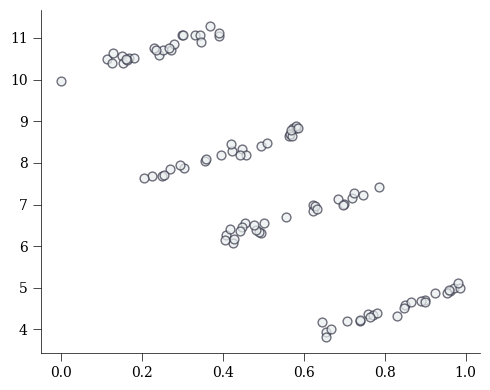

In [119]:
fig, ax = plt.subplots(figsize=(5, 4))
plt.scatter(
    A[:, 0],
    A[:, 1],
    color=colours[-1],
    edgecolors=colours[0],
    linewidths=1,
    alpha=0.7,
    s=40,
)

ax.tick_params(axis="both", labelfontfamily="Serif", labelsize=10, width=0.5, length=6)

for s in ["top", "left", "right", "bottom"]:
    ax.spines[s].set_linewidth(0.5)

plt.tight_layout()
plt.savefig(
    f"{save_dir}/{file_name}-1.svg", dpi=75, bbox_inches="tight", edgecolor="none"
)
plt.show()

In [120]:
def lingress(a, b, intercept=True):
    if intercept:
        a = np.vstack([a.flatten(), np.ones(len(a))]).T
    return np.linalg.inv(a.T @ a) @ a.T @ b

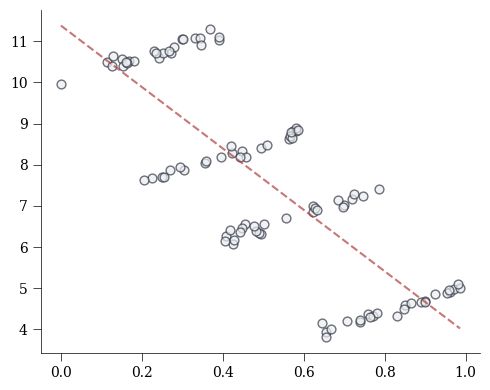

In [121]:
fig, ax = plt.subplots(figsize=(5, 4))

x_range = np.linspace(min(A[:, 0]), max(A[:, 0]), m * 4)
x, y = lingress(A[:, 0], A[:, 1], intercept=True)

plt.scatter(
    A[:, 0],
    A[:, 1],
    color=colours[-1],
    edgecolors=colours[0],
    linewidths=1,
    alpha=0.7,
    s=40,
)

plt.plot(
    x_range,
    x * x_range + y,
    color="#AF3E3E",
    alpha=0.7,
    linestyle="--",
)

ax.tick_params(axis="both", labelfontfamily="Serif", labelsize=10, width=0.5, length=6)

for s in ["top", "left", "right", "bottom"]:
    ax.spines[s].set_linewidth(0.5)

plt.tight_layout()
plt.savefig(
    f"{save_dir}/{file_name}-2.svg", dpi=75, bbox_inches="tight", edgecolor="none"
)
plt.show()

In [122]:
def h(x, y, a, b, p=2):
    return np.abs(np.inner(x, a) + y - b) ** p

In [123]:
def obj(x, y, a, b, p=2):
    return np.sum(h(x, y, a, b, p=p))

In [124]:
past = {1: lingress(A[:, 0], A[:, 1])}
print(obj(past[1][0], past[1][1], A[:, 0], A[:, 1], p=2))

196.65470176773368


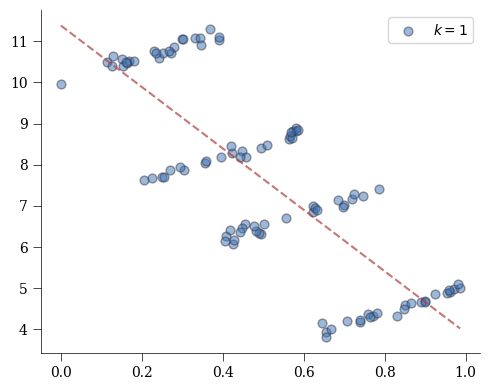

In [125]:
fig, ax = plt.subplots(figsize=(5, 4))

x_range = np.linspace(min(A[:, 0]), max(A[:, 0]), m * 4)
x, y = lingress(A[:, 0], A[:, 1], intercept=True)

plt.scatter(
    A[:, 0],
    A[:, 1],
    color=regression_c[0],
    edgecolors=colours[0],
    linewidths=1,
    alpha=0.5,
    s=40,
    label="$k=1$",
)

plt.plot(
    x_range,
    x * x_range + y,
    color="#AF3E3E",
    alpha=0.7,
    linestyle="--",
)

ax.tick_params(axis="both", labelfontfamily="Serif", labelsize=10, width=0.5, length=6)

for s in ["top", "left", "right", "bottom"]:
    ax.spines[s].set_linewidth(0.5)

plt.legend()
plt.tight_layout()
plt.savefig(
    f"{save_dir}/{file_name}-3.svg", dpi=75, bbox_inches="tight", edgecolor="none"
)

plt.show()

In [126]:
def auxiliary_function(u, v, A, errors):
    costs = 0.0
    for i in range(len(A)):
        e = (u * A[i, 0] + v - A[i, 1]) ** 2
        costs += min(errors[i], e)
    return costs

In [127]:
past = {1: lingress(A[:, 0], A[:, 1])}

errors = []
for i in range(len(A)):
    e = (past[1][0] * A[i, 0] + past[1][1] - A[i, 1]) ** 2
    errors.append(e)

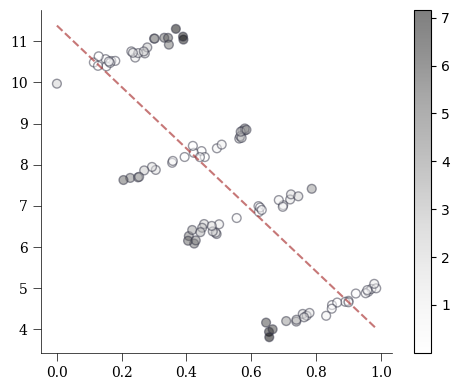

In [128]:
fig, ax = plt.subplots(figsize=(5, 4))

x_range = np.linspace(min(A[:, 0]), max(A[:, 0]), m * 4)
x, y = lingress(A[:, 0], A[:, 1], intercept=True)

plt.scatter(
    A[:, 0],
    A[:, 1],
    c=errors,
    cmap="Grays",
    # color=regression_c[0],
    edgecolors=colours[0],
    linewidths=1,
    alpha=0.5,
    s=40,
    label="$k=1$",
)

plt.plot(
    x_range,
    x * x_range + y,
    color="#AF3E3E",
    alpha=0.7,
    linestyle="--",
)

cbar = plt.colorbar()
ax.tick_params(axis="both", labelfontfamily="Serif", labelsize=10, width=0.5, length=6)

for s in ["top", "left", "right", "bottom"]:
    ax.spines[s].set_linewidth(0.5)

# plt.legend()
plt.tight_layout()
plt.savefig(
    f"{save_dir}/{file_name}-4.svg", dpi=75, bbox_inches="tight", edgecolor="none"
)

plt.show()

In [129]:
def generate_initial_candidates(A, past):
    """
    Create candidate regression lines based on data points
    """
    candidates = []
    slope, intercept = past[1][0], past[1][1]

    for j in range(len(A)):
        a_j, b_j = A[j, 0], A[j, 1]

        # Create parallel line through (a_j, b_j)
        u_j = slope  # Same slope
        v_j = b_j - slope * a_j  # Adjusted intercept

        candidates.append((j, u_j, v_j))

    return candidates


candidates = generate_initial_candidates(A, past)

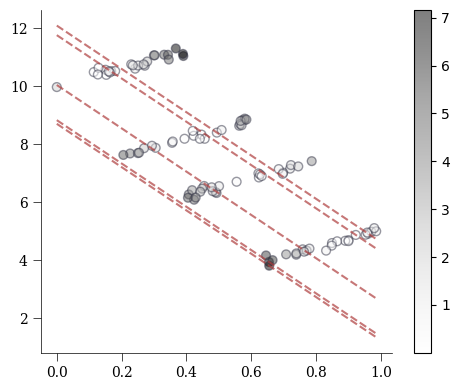

In [136]:
fig, ax = plt.subplots(figsize=(5, 4))

x_range = np.linspace(min(A[:, 0]), max(A[:, 0]), m * 4)
x, y = lingress(A[:, 0], A[:, 1], intercept=True)

plt.scatter(
    A[:, 0],
    A[:, 1],
    c=errors,
    cmap="Grays",
    # color=regression_c[0],
    edgecolors=colours[0],
    linewidths=1,
    alpha=0.5,
    s=40,
    label="$k=1$",
)

for c in candidates[:5]:
    plt.plot(
        x_range,
        c[1] * x_range + c[2],
        color="#AF3E3E",
        alpha=0.7,
        linestyle="--",
    )

cbar = plt.colorbar()
ax.tick_params(axis="both", labelfontfamily="Serif", labelsize=10, width=0.5, length=6)

for s in ["top", "left", "right", "bottom"]:
    ax.spines[s].set_linewidth(0.5)

# plt.legend()
plt.tight_layout()
# plt.savefig(
#     f"{save_dir}/{file_name}-4.svg", dpi=75, bbox_inches="tight", edgecolor="none"
# )

plt.show()